# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

# Import libraries 
Do not use any other Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [2]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [3]:
def sigmoid(input):

  # dummy assignment until the function is filled in
  output = 1/(1+ np.exp(-input))
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [4]:
def predict_logistic_regression(inputs, weights):

  # dummy assignment until the function is filled in
  predicted_probabilities = sigmoid(inputs@weights)
  return predicted_probabilities

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [5]:
def eval_logistic_regression(inputs, weights, labels):
  
  # dummy assignment until the function is filled in
  N = len(labels)
  dim = np.shape(inputs)[1]
  predicted_result = sigmoid(inputs@weights)  
  predicted_label = np.zeros((N,1))
  predicted_label[predicted_result > 0.5] = 1
  correct_label = np.zeros((N,1))
  correct_label[predicted_label == labels.reshape((N,1))] = 1
  accuracy = np.sum(correct_label)/N  
  #accuracy = 0

  # calculate negative log likelihood
  Sigma = sigmoid(inputs@weights)
  neg_log_prob = -np.sum(np.multiply(labels.reshape(N,1),np.log(Sigma)) + np.multiply((1-labels.reshape(N,1)),np.log(1-Sigma))) 
  return neg_log_prob, accuracy

Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.05,0.05]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [6]:
def initialize_weights(n_weights):
  random_weights = np.random.uniform(low = -0.05, high = 0.05, size = n_weights)
  return random_weights

# Function train_logistic_regression

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop Newton's algorithm when the maximum change for all weights is less than 0.001 in two consecutive iterations. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [7]:
def train_logistic_regression(train_inputs, train_labels, lambda_hyperparam):
  dim = np.shape(train_inputs)[1]
  N = len(train_labels)
  # weight iniliazation
  first_weight = np.ones((dim,1))
  second_weight = initialize_weights(dim).reshape(dim,1)
  # while loop terminates until every single element in the weight vector less than 0.001
  while np.max(abs(first_weight - second_weight) > 0.001):
    first_weight = second_weight
    X_bar = np.transpose(train_inputs).reshape((dim,N))  # need to modify the input (whether it's train or test)
    X_bar_transpose = train_inputs
    Sigma = sigmoid(train_inputs@second_weight)
    Sigma2 = 1 - Sigma
    R = np.eye(N)*np.multiply(Sigma,Sigma2)
    Hessian = X_bar@R@X_bar_transpose  + lambda_hyperparam*np.eye(dim) 
    gradient = np.transpose((Sigma - train_labels.reshape(N,1)))@train_inputs + lambda_hyperparam*np.transpose(first_weight).reshape((1,dim))
    second_weight = first_weight - np.linalg.inv(Hessian)@(np.transpose(gradient).reshape((dim,1)))
  weights = second_weight
  return weights

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [8]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels):
  
  # dummy assignments until the function is filled in
  N = len(labels)
  dim = np.shape(inputs)[1]
  validate_length = int(N/k_folds)
  neg_log_probabilities = np.zeros(len(hyperparams))
  accuracy = np.zeros(len(hyperparams))
  for index,j in enumerate(hyperparams):
    accs= np.zeros(k_folds)
    log_likelihood = np.zeros(k_folds)
    for i in range(k_folds):
        # split the data set as validate_data and train_data
        # split the label as validate_value and train_value
          validate_data, train_data = train_validate_data_split(train_inputs, i, validate_length)
          validate_value, train_value = train_validate_data_split(train_labels,i,validate_length)
          validate_value= validate_value.reshape((len(validate_value),1))
          train_value = train_value.reshape((len(train_value),1))
          validate_data = validate_data.reshape((len(validate_data),dim))
          train_data = train_data.reshape((len(train_data),dim))
          weights = train_logistic_regression(train_data, train_value, j)
        # split the label set 
        
        #validate_data_x_bar = generate_x_bar(validate_data)
          log_likelihood[i],accs[i] = eval_logistic_regression(validate_data, weights, validate_value) # calculate mse for all k_folds
          log_likelihood[i] = log_likelihood[i] 
    neg_log_probabilities[index] = np.average(log_likelihood)  # take the average value of k_folds number of mse
    accuracy[index] = np.average(accs)
  best_neg_log_prob = np.amin(neg_log_probabilities)    # find the minimum value of mse
  best_hyperparam = int(np.where(neg_log_probabilities == best_neg_log_prob)[0])  #find the babel  
  return best_hyperparam, best_neg_log_prob, neg_log_probabilities

In [9]:
def train_validate_data_split(inputs, i, validate_length):
    data_split = np.split(inputs,[i*validate_length,(i+1)*validate_length])
    validate_data = data_split[1]
    train_data = np.concatenate((data_split[0],data_split[2]))
    return validate_data,train_data

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [10]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

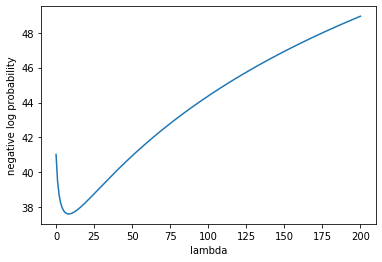

best lambda: 8
best cross validation negative log probability: 37.608064347355594
test accuracy: 0.8727272727272727
test negative log probability: 33.29203064888895


In [11]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

# lambda values to be evaluated by cross validation
hyperparams = range(201)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels)

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights = train_logistic_regression(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('test accuracy: ' + str(accuracy))
print('test negative log probability: ' + str(neg_log_prob))



## Part two
#### Compare the expressivity between two seperators.

I think the performance of two separators really depends on whether the data set is linear separable or not. If the data set is linear separable, a linear classifier could fit a boundary line in 2D to separate two classes. In contrast, non-linear separator could mis-classify the labels of the data. For example, in KNN method, if several points are close enough to the point, the point probably will be mis-classify because the these points. In this case, linear separator performs better than the non-linear separator. 

However, if the data set is not linear separable, which mean it does not exist a line that is able to separate two classes, then the non-linear separator performs better than linear separator.

In term of expressivity, I think KNN out-perform than logistic regression since there are less domain of the datasets that are purely linearly separable. As disscussed above, KNN performs better in those non-linearly separable dataset.

#### What could explain the results obtained with KNN in comparison to the results obtained with logistic regression?

As we see from the result, the test accuracy from KNN was about 78%, but the test accuracy from the logistic regression in this test is about 87.27%. The result illustrates the performance of linear separator performs better than the non-linear separator. The data set is not linearly separable probably because some noise points.


#### Is the training set used in this assignment linearly separable?
To see whether the training set is linearly separable, we borrow the weight obtained from training data set, and then try to use this weight to perform a logistic classifer on the labels of training data set. If the accuracy is high enough, it proves the training data set is linearly separable, if the accuracy is not high, it proves the training data set is non-linearly separable.

In [12]:
# train and evaluate with best lambda
weights = train_logistic_regression(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(train_inputs, weights, train_labels)
print('test accuracy: ' + str(accuracy))
print('test negative log probability: ' + str(neg_log_prob))

test accuracy: 0.878
test negative log probability: 334.9713955279217


As we can see from the result, the test accuracy of the logistic classifer on training data set is about 87%, which proves the training data set is not linearly separable.